# Lecture 09의 데모

### Lecture 09의 데모에 대한 코드

참고자료: 

https://github.com/data-8/materials-sp22/blob/main/lec/lec13.ipynb

https://github.com/data-8/materials-sp22/blob/main/lec/lec14.ipynb

In [ ]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/ITEC419-fa22/lec

Mounted at /content/gdrive
/content/gdrive/MyDrive/ITEC419-fa22/lec


In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## **Comparison** ##

## **Comparisons with arrays**

In [ ]:
s = make_array('John', 'John', 'Jack', 'John')
s

array(['John', 'John', 'Jack', 'John'],
      dtype='<U4')

In [ ]:
tips = Table.read_table('tips.csv')
tips.show(3)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3


## **Rows & Apply**

In [ ]:
tips.show(3)

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3


## **Conditional Statements**

In [ ]:
def age(x):
    if x >= 21:
        return 'You can legally vote and drink.'
    elif x >= 18: # This only gets checked if the "if" condition was false
        return 'You can legally vote.'
    else: # only runs if all the if/elif conditions was false
        return 'You can legally drink milk.'

In [ ]:
trip = Table().read_table('trip.csv')
trip.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107


In [ ]:
def trip_kind(start, end):
    if start == end:
        return 'round trip'
    else:
        return 'one way'

kinds = trip.with_column('Trip Kind', trip.apply(trip_kind, 'Start Station', 'End Station'))
kinds.show(3)

Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscriber Type,Zip Code,Trip Kind
913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139,one way
913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032,one way
913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107,one way


In [ ]:
kinds.where('Duration', are.below(600)).pivot('Trip Kind', 'Start Station')

Start Station,one way,round trip
2nd at Folsom,6821,25
2nd at South Park,6484,98
2nd at Townsend,9513,83
5th at Howard,5752,36
Adobe on Almaden,439,8
Arena Green / SAP Center,382,18
Beale at Market,5750,32
Broadway St at Battery St,4482,59
California Ave Caltrain Station,39,12
Castro Street and El Camino Real,1005,10


## **Simulation**

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [ ]:
# A start (work in progress)
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [ ]:
# Final correct version
def one_round(my_roll, your_roll):
    ...

### **Random Selection**

In [ ]:
mornings = make_array('wake up', 'sleep in')

We can also pass an argument that specifies how many times to make a random choice:

### **Simulating the roll of a die**

In [ ]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

### **Appending Arrays**

### **Repeated Betting**

## **`For` Statements**

### **Simulating heads in 100 coin tosses**

In [ ]:
# Simulate one outcome


In [ ]:
# Decide how many times you want to repeat the experiment


In [ ]:
# Simulate that many outcomes


### **Chance of At Least One Success in Independently Repeated Success/Failure Trials**

In [ ]:
# Chance of no sixes in 4 rolls of a die


In [ ]:
# Chance of at least one six in 4 rolls of a die


In [ ]:
# Chance of at least one six in n rolls of a die


## **The Monty Hall Problem**

In [ ]:
goats = make_array('first goat', 'second goat')
goats

array(['first goat', 'second goat'],
      dtype='<U11')

In [ ]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [ ]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [ ]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [ ]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [ ]:
monty_hall_game()

['car', 'second goat', 'first goat']

In [ ]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())

In [ ]:
games.show(3)

Guess,Revealed,Remaining
second goat,first goat,car
second goat,first goat,car
second goat,first goat,car


In [ ]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3293
first goat,3393
second goat,3314


In [ ]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6707
first goat,1646
second goat,1647


In [ ]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3293,6707
first goat,3393,1646
second goat,3314,1647


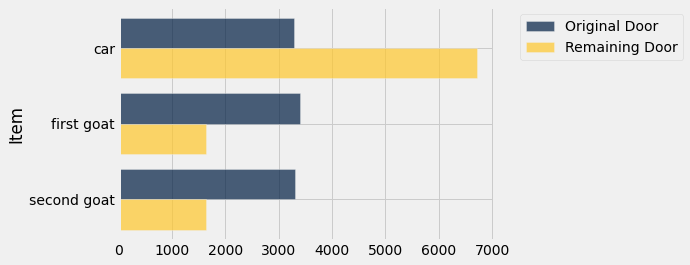

In [ ]:
combined.barh(0)